In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from dmba import classificationSummary
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
red_wine = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\winequality-red.csv',header = 0)
white_wine = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\winequality-white.csv',header = 0)

In [3]:
print('Red_wine groups: \n{}'.format(red_wine['quality'].value_counts()))
print('White_wine groups: \n{}'.format(white_wine['quality'].value_counts()))

Red_wine groups: 
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
White_wine groups: 
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


# export csv file 

X = red_wine.drop('quality',axis = 1)
y = red_wine['quality']
for i in range(3):
    i = i + 1
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.9)
    train = pd.concat([X_train,y_train],axis=1)
    test = pd.concat([X_test,y_test],axis=1)
    train.to_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\red_train_{}.csv'.format(i), index = False)
    test.to_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\red_test_{}.csv'.format(i), index = False)

X = white_wine.drop('quality',axis = 1)
y = white_wine['quality']
for i in range(3):
    i = i + 1
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.9)
    train = pd.concat([X_train,y_train],axis=1)
    test = pd.concat([X_test,y_test],axis=1)
    train.to_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\white_train_{}.csv'.format(i), index = False)
    test.to_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\white_test_{}.csv'.format(i), index = False)

# Chay tu day


In [4]:
red_train_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\red_train_1.csv')
red_train_2 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\red_train_2.csv')
red_train_3 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\red_train_3.csv')
red_test_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\red_test_1.csv')
red_test_2 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\red_test_2.csv')
red_test_3 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\red_test_3.csv')

In [5]:
X_red_train_1=red_train_1.drop(['quality'],axis=1)
X_red_train_2=red_train_2.drop(['quality'],axis=1)
X_red_train_3=red_train_3.drop(['quality'],axis=1)
X_red_test_1=red_test_1.drop(['quality'],axis=1)
X_red_test_2=red_test_2.drop(['quality'],axis=1)
X_red_test_3=red_test_3.drop(['quality'],axis=1)
y_red_train_1=red_train_1['quality']
y_red_train_2=red_train_2['quality'] 
y_red_train_3=red_train_3['quality'] 
y_red_test_1=red_test_1['quality'] 
y_red_test_2=red_test_2['quality'] 
y_red_test_3=red_test_3['quality'] 

In [6]:
y_red_train_1= [ 0 if ( i < 7 ) else 1 for i in y_red_train_1]
y_red_train_2= [ 0 if ( i < 7 ) else 1 for i in y_red_train_2]
y_red_train_3= [ 0 if ( i < 7 ) else 1 for i in y_red_train_3]
y_red_test_1= [ 0 if ( i < 7 ) else 1 for i in y_red_test_1]
y_red_test_2= [ 0 if ( i < 7 ) else 1 for i in y_red_test_2]
y_red_test_3= [ 0 if ( i < 7 ) else 1 for i in y_red_test_3]

In [7]:
#scaler
std = StandardScaler()
X_red_train_1 = std.fit_transform(X_red_train_1)
X_red_test_1 = std.transform(X_red_test_1)

In [8]:
#Kmeans
km = KMeans(n_clusters = 2,random_state = 42)
km.fit(X_red_train_1)
clusters = km.predict(X_red_train_1)

In [9]:
X_centre = km.cluster_centers_

In [10]:
pca = PCA(n_components = 2, random_state = 42)
X_red_train_1 = pd.DataFrame(pca.fit_transform(X_red_train_1),columns = ['PCA1','PCA2'])
X_red_train_1['cluster'] = clusters
X_centre = pd.DataFrame(pca.transform(X_centre),columns = ['PCA1','PCA2'])

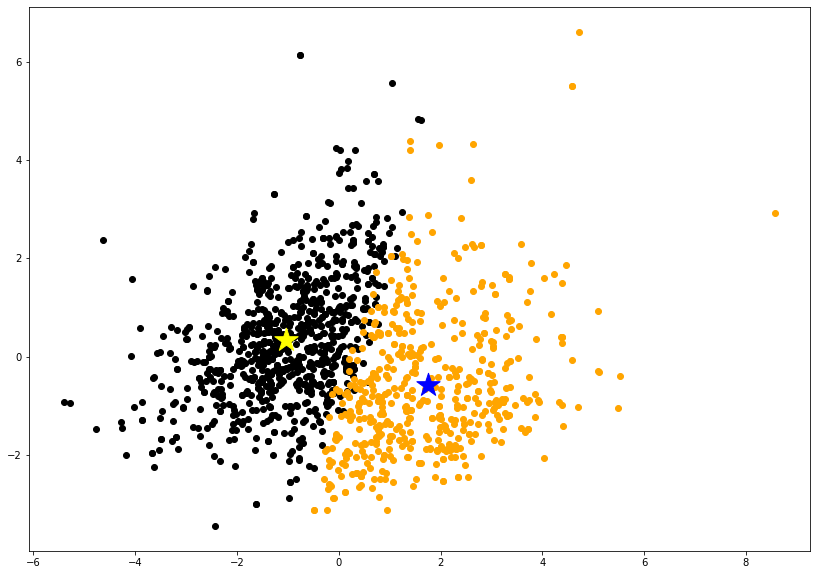

In [11]:
plt.figure(figsize = (14,10))
plt.scatter(X_red_train_1[X_red_train_1['cluster'] == 0].loc[:,'PCA1'],X_red_train_1[X_red_train_1['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_red_train_1[X_red_train_1['cluster'] == 1].loc[:,'PCA1'],X_red_train_1[X_red_train_1['cluster'] == 1].loc[:,'PCA2'],color = 'orange')
plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'yellow',marker = '*',s = 600)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'blue',marker = '*',s = 600)

In [12]:
#for testing
clusters = km.predict(X_red_test_1)
X_centre = km.cluster_centers_

X_red_test_1 = pd.DataFrame(pca.transform(X_red_test_1),columns = ['PCA1','PCA2'])
X_red_test_1['cluster'] = clusters
X_centre = pd.DataFrame(pca.transform(X_centre),columns = ['PCA1','PCA2'])

In [13]:
a = confusion_matrix(y_red_test_1,clusters)
a_1 = np.mean(y_red_test_1 == clusters)

In [14]:
classificationSummary(y_red_test_1,clusters)

Confusion Matrix (Accuracy 0.6687)

       Prediction
Actual  0  1
     0 98 43
     1 10  9


In [15]:
precision = (9/(9+43))
print("Precision : {}".format(precision))

Precision : 0.17307692307692307


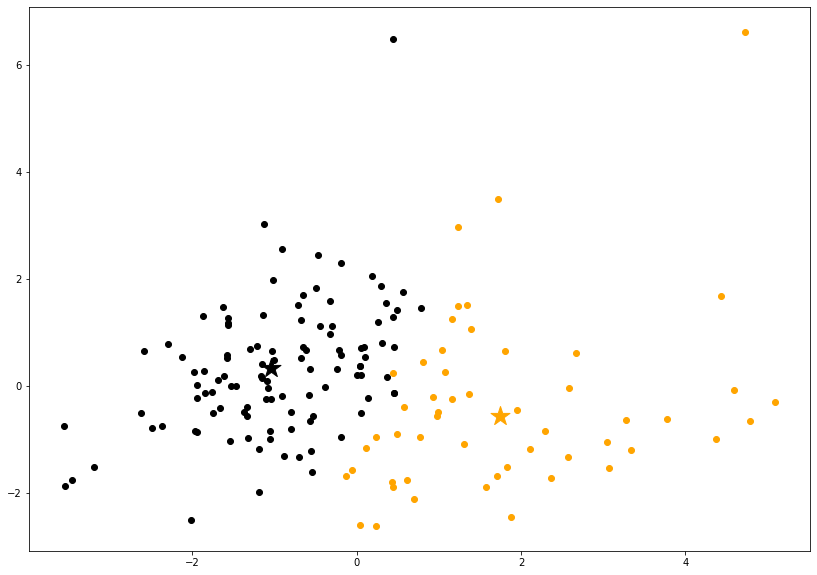

In [16]:
plt.figure(figsize = (14,10))
plt.scatter(X_red_test_1[X_red_test_1['cluster'] == 0].loc[:,'PCA1'],X_red_test_1[X_red_test_1['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_red_test_1[X_red_test_1['cluster'] == 1].loc[:,'PCA1'],X_red_test_1[X_red_test_1['cluster'] == 1].loc[:,'PCA2'],color = 'orange')
plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)


# Red_2

In [17]:
#for train_set_2
std_2 = StandardScaler()
X_red_train_2 = std_2.fit_transform(X_red_train_2)
X_red_test_2 = std_2.transform(X_red_test_2)
km = KMeans(n_clusters = 2,random_state=42)
km.fit(X_red_train_2)
clusters = km.predict(X_red_train_2)
X_centre = km.cluster_centers_
pca_2 = PCA(n_components = 2,random_state=42)
X_red_train_2 = pd.DataFrame(pca_2.fit_transform(X_red_train_2),columns = ['PCA1','PCA2'])
X_red_train_2['cluster'] = clusters
X_centre = pd.DataFrame(pca_2.transform(X_centre),columns = ['PCA1','PCA2'])

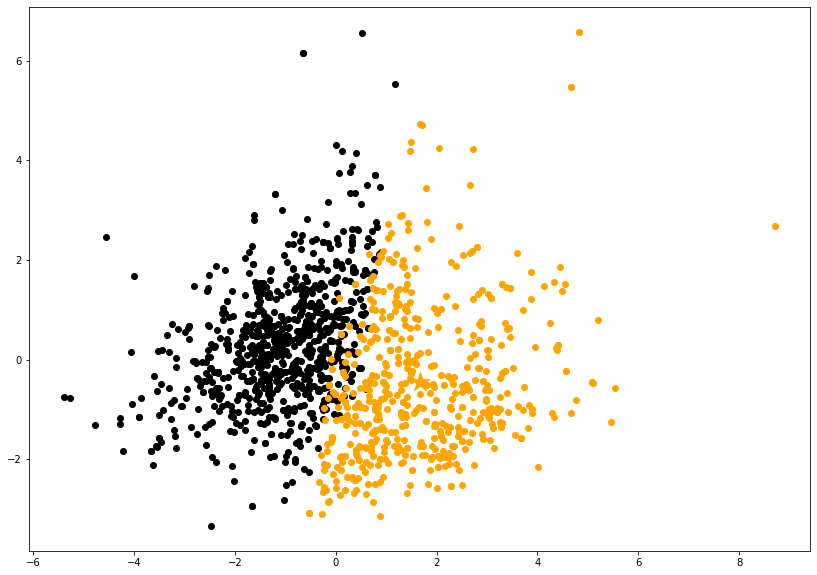

In [18]:
plt.figure(figsize = (14,10))
plt.scatter(X_red_train_2[X_red_train_2['cluster'] == 0].loc[:,'PCA1'],X_red_train_2[X_red_train_2['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_red_train_2[X_red_train_2['cluster'] == 1].loc[:,'PCA1'],X_red_train_2[X_red_train_2['cluster'] == 1].loc[:,'PCA2'],color = 'orange')

plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)


In [19]:
#for testing set 2
clusters = km.predict(X_red_test_2)
X_red_test_2 = pd.DataFrame(pca_2.transform(X_red_test_2),columns = ['PCA1','PCA2'])
X_red_test_2['cluster'] = clusters

In [20]:
b = confusion_matrix(y_red_test_2,clusters)
b_1 = np.mean(y_red_test_2 == clusters)

In [21]:
classificationSummary(y_red_test_2,clusters)

Confusion Matrix (Accuracy 0.6375)

       Prediction
Actual  0  1
     0 87 53
     1  5 15


In [22]:
precision = (15/(15+53))
print("Precision : {}".format(precision))

Precision : 0.22058823529411764


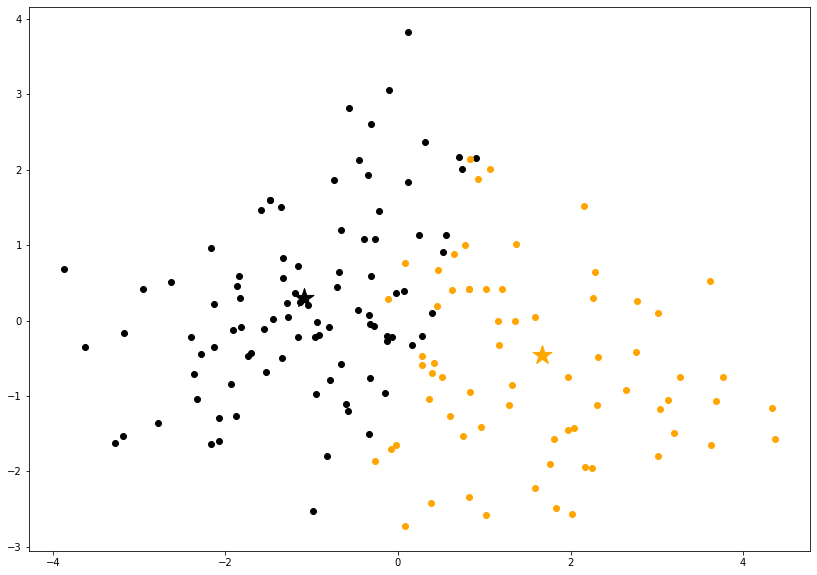

In [23]:
plt.figure(figsize = (14,10))
plt.scatter(X_red_test_2[X_red_test_2['cluster'] == 0].loc[:,'PCA1'],X_red_test_2[X_red_test_2['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_red_test_2[X_red_test_2['cluster'] == 1].loc[:,'PCA1'],X_red_test_2[X_red_test_2['cluster'] == 1].loc[:,'PCA2'],color = 'orange')

plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)


# Red_3

In [24]:
#for training set 3
std_3 = StandardScaler()
X_red_train_3 = std_3.fit_transform(X_red_train_3)
X_red_test_3 = std_3.transform(X_red_test_3)
km = KMeans(n_clusters = 2,random_state=42)
km.fit(X_red_train_3)
clusters = km.predict(X_red_train_3)
X_centre = km.cluster_centers_
pca_3 = PCA(n_components = 2,random_state=42)
X_red_train_3 = pd.DataFrame(pca_3.fit_transform(X_red_train_3),columns = ['PCA1','PCA2'])
X_red_train_3['cluster'] = clusters
X_centre = pd.DataFrame(pca_3.transform(X_centre),columns = ['PCA1','PCA2'])

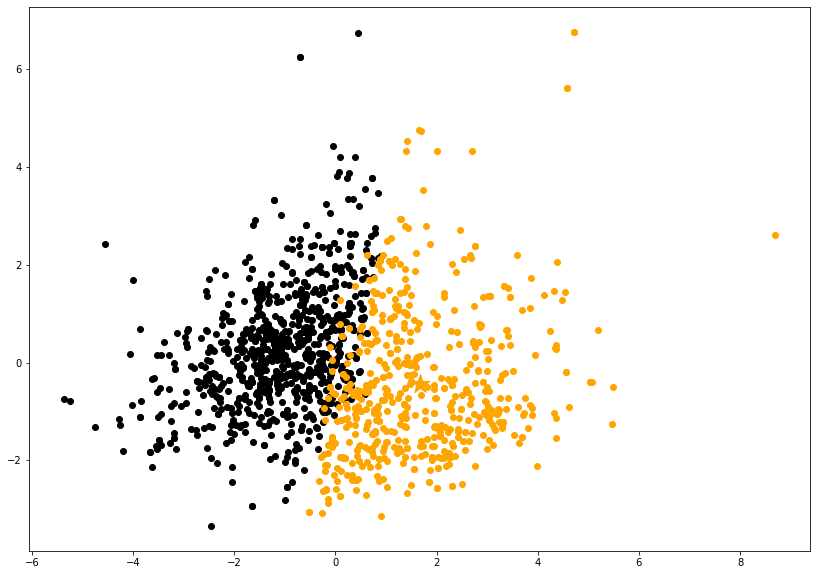

In [25]:
plt.figure(figsize = (14,10))
plt.scatter(X_red_train_3[X_red_train_3['cluster'] == 0].loc[:,'PCA1'],X_red_train_3[X_red_train_3['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_red_train_3[X_red_train_3['cluster'] == 1].loc[:,'PCA1'],X_red_train_3[X_red_train_3['cluster'] == 1].loc[:,'PCA2'],color = 'orange')

plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)


In [26]:
#for testing set 3
clusters = km.predict(X_red_test_3)

X_red_test_3 = pd.DataFrame(pca_3.transform(X_red_test_3),columns = ['PCA1','PCA2'])
X_red_test_3['cluster'] = clusters



In [27]:
c = confusion_matrix(y_red_test_3,clusters)
c_1 = np.mean(y_red_test_3 == clusters)

In [28]:
classificationSummary(y_red_test_3,clusters)

Confusion Matrix (Accuracy 0.6188)

       Prediction
Actual  0  1
     0 85 52
     1  9 14


In [29]:
precision = (14/(14+52))
print("Precision : {}".format(precision))

Precision : 0.21212121212121213


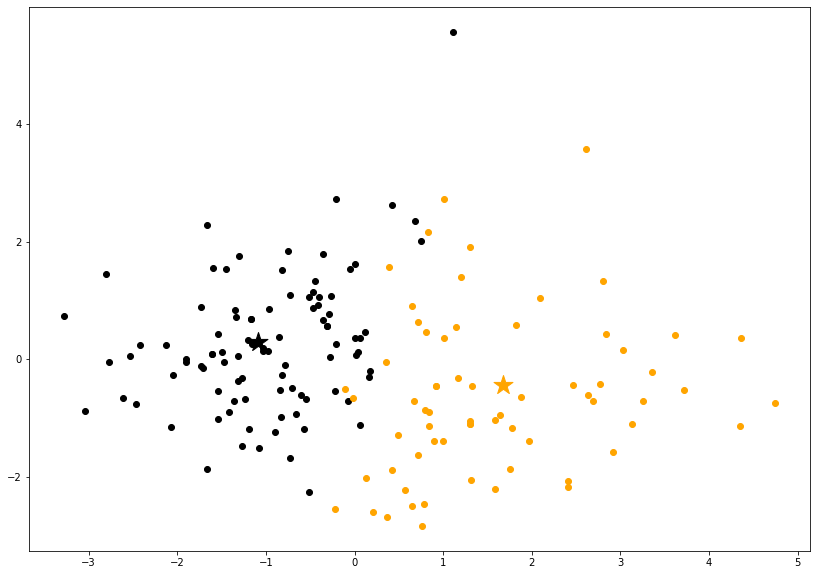

In [30]:
plt.figure(figsize = (14,10))
plt.scatter(X_red_test_3[X_red_test_3['cluster'] == 0].loc[:,'PCA1'],X_red_test_3[X_red_test_3['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_red_test_3[X_red_test_3['cluster'] == 1].loc[:,'PCA1'],X_red_test_3[X_red_test_3['cluster'] == 1].loc[:,'PCA2'],color = 'orange')

plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)


In [31]:
Mean = (a+b+c)/3
print("Mean_Confusion_matrix_Red_wine:\n {}".format(Mean)) 
mean = (a_1 + b_1 + c_1)/3
print("Mean_accuracy_Red_wine: {}".format(mean))

Mean_Confusion_matrix_Red_wine:
 [[90.         49.33333333]
 [ 8.         12.66666667]]
Mean_accuracy_Red_wine: 0.6416666666666666


# White_wine

In [32]:
white_train_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\white_train_1.csv')
white_train_2 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\white_train_2.csv')
white_train_3 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\white_train_3.csv')
white_test_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\white_test_1.csv')
white_test_2 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\white_test_2.csv')
white_test_3 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\white_test_3.csv')

In [33]:
X_white_train_1=white_train_1.drop(['quality'],axis=1)
X_white_train_2=white_train_2.drop(['quality'],axis=1)
X_white_train_3=white_train_3.drop(['quality'],axis=1)
X_white_test_1=white_test_1.drop(['quality'],axis=1)
X_white_test_2=white_test_2.drop(['quality'],axis=1)
X_white_test_3=white_test_3.drop(['quality'],axis=1)
y_white_train_1=white_train_1['quality']
y_white_train_2=white_train_2['quality'] 
y_white_train_3=white_train_3['quality'] 
y_white_test_1=white_test_1['quality'] 
y_white_test_2=white_test_2['quality'] 
y_white_test_3=white_test_3['quality'] 

In [34]:
y_white_train_1 = [0 if ( i < 7) else 1 for i in y_white_train_1]
y_white_train_2 = [0 if ( i < 7) else 1 for i in y_white_train_2]
y_white_train_3 = [0 if ( i < 7) else 1 for i in y_white_train_3]
y_white_test_1 = [0 if ( i < 7) else 1 for i in y_white_test_1]
y_white_test_2 = [0 if ( i < 7) else 1 for i in y_white_test_2]
y_white_test_3 = [0 if ( i < 7) else 1 for i in y_white_test_3]

In [35]:
#train_1
std_1 = StandardScaler()
X_white_train_1 = std_1.fit_transform(X_white_train_1)
X_white_test_1 = std_1.transform(X_white_test_1)
km = KMeans(n_clusters = 2,random_state=42)
km.fit(X_white_train_1)
clusters = km.predict(X_white_train_1)
X_centre = km.cluster_centers_
pca_1 = PCA(n_components = 2,random_state=42)
X_white_train_1 = pd.DataFrame(pca_1.fit_transform(X_white_train_1),columns = ['PCA1','PCA2'])
X_white_train_1['cluster'] = clusters
X_centre = pd.DataFrame(pca_1.transform(X_centre),columns = ['PCA1','PCA2'])

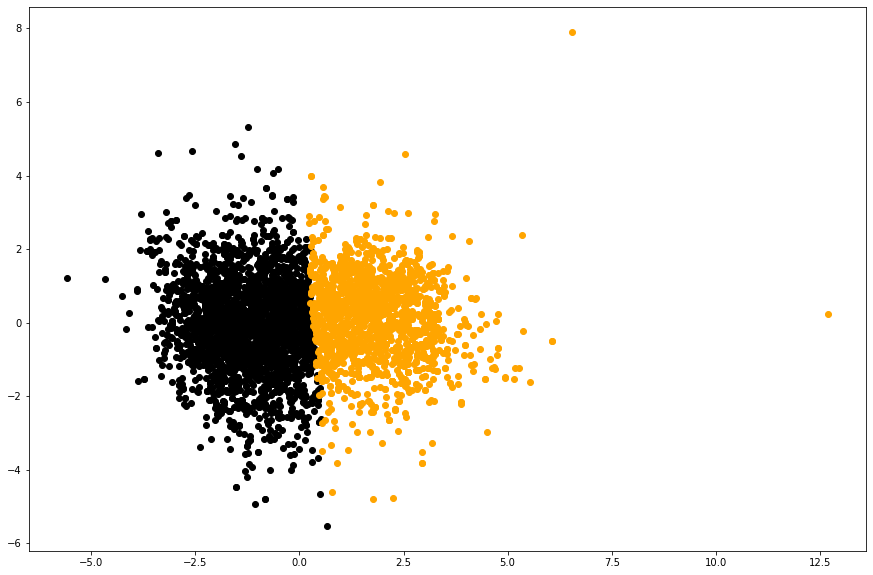

In [36]:
plt.figure(figsize = (15,10))
plt.scatter(X_white_train_1[X_white_train_1['cluster'] == 0].loc[:,'PCA1'],X_white_train_1[X_white_train_1['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_white_train_1[X_white_train_1['cluster'] == 1].loc[:,'PCA1'],X_white_train_1[X_white_train_1['cluster'] == 1].loc[:,'PCA2'],color = 'orange')
plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)

In [37]:
#test1
clusters = km.predict(X_white_test_1)
X_white_test_1 = pd.DataFrame(pca_1.transform(X_white_test_1),columns = ['PCA1','PCA2'])
X_white_test_1['cluster'] = clusters

In [38]:
d = confusion_matrix(y_white_test_1,clusters)
d_1 = np.mean(y_white_test_1 == clusters)

In [39]:
classificationSummary(y_white_test_1,clusters)

Confusion Matrix (Accuracy 0.4551)

       Prediction
Actual   0   1
     0 206 192
     1  75  17


In [40]:
precision = (17/(17+192))
print("Precision : {}".format(precision))

Precision : 0.08133971291866028


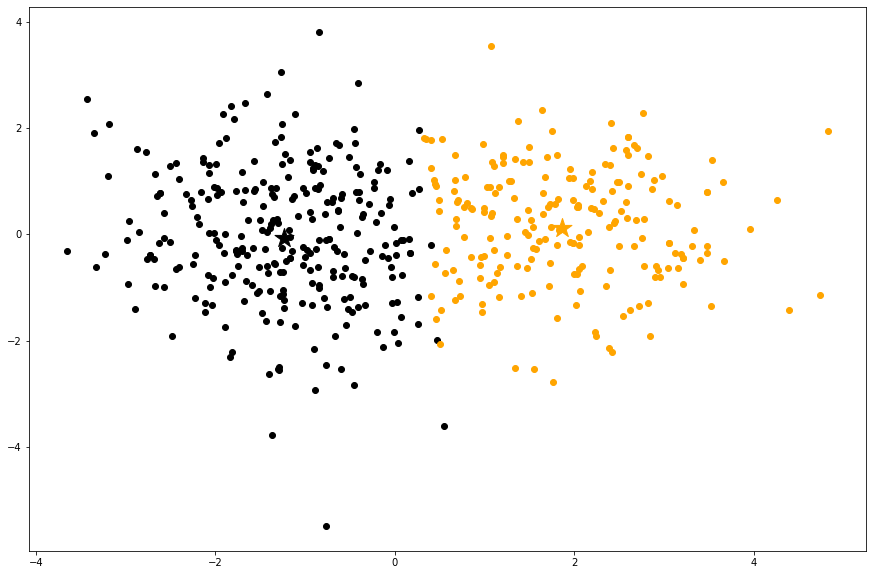

In [41]:
plt.figure(figsize = (15,10))
plt.scatter(X_white_test_1[X_white_test_1['cluster'] == 0].loc[:,'PCA1'],X_white_test_1[X_white_test_1['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_white_test_1[X_white_test_1['cluster'] == 1].loc[:,'PCA1'],X_white_test_1[X_white_test_1['cluster'] == 1].loc[:,'PCA2'],color = 'orange')
plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)

In [42]:
#train_2
std_2 = StandardScaler()
X_white_train_2 = std_2.fit_transform(X_white_train_2)
X_white_test_2 = std_2.transform(X_white_test_2)
km = KMeans(n_clusters = 2,random_state=42)
km.fit(X_white_train_2)
clusters = km.predict(X_white_train_2)
X_centre = km.cluster_centers_
pca_2 = PCA(n_components = 2,random_state=42)
X_white_train_2 = pd.DataFrame(pca_2.fit_transform(X_white_train_2),columns = ['PCA1','PCA2'])
X_white_train_2['cluster'] = clusters
X_centre = pd.DataFrame(pca_2.transform(X_centre),columns = ['PCA1','PCA2'])

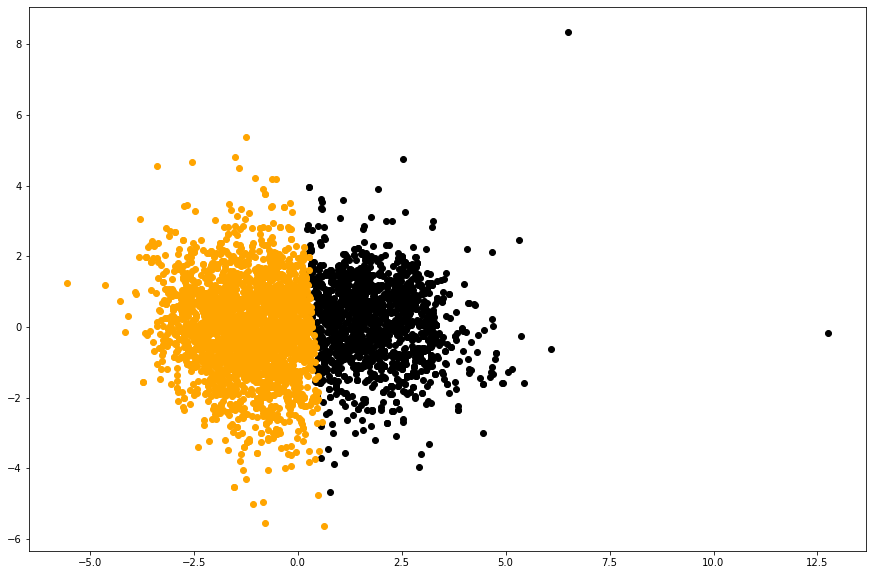

In [43]:
plt.figure(figsize = (15,10))
plt.scatter(X_white_train_2[X_white_train_2['cluster'] == 0].loc[:,'PCA1'],X_white_train_2[X_white_train_2['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_white_train_2[X_white_train_2['cluster'] == 1].loc[:,'PCA1'],X_white_train_2[X_white_train_2['cluster'] == 1].loc[:,'PCA2'],color = 'orange')
plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)

In [44]:
#test2
clusters = km.predict(X_white_test_2)

X_white_test_2 = pd.DataFrame(pca_2.transform(X_white_test_2),columns = ['PCA1','PCA2'])
X_white_test_2['cluster'] = clusters


In [45]:
e = confusion_matrix(y_white_test_2,clusters)
e_1 = np.mean(y_white_test_2 == clusters)

In [46]:
classificationSummary(y_white_test_2,clusters)

Confusion Matrix (Accuracy 0.6020)

       Prediction
Actual   0   1
     0 197 187
     1   8  98


In [47]:
precision = (98/(98+187))
print("Precision : {}".format(precision))

Precision : 0.34385964912280703


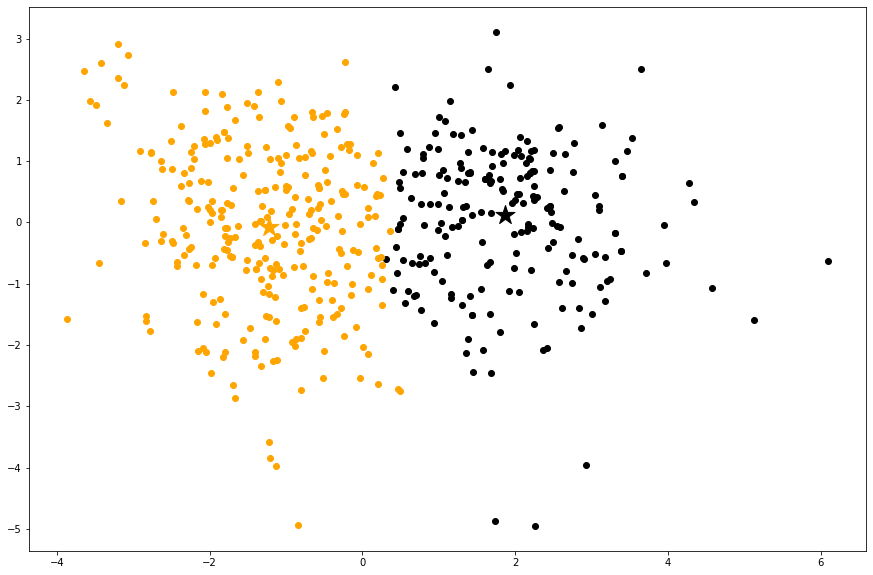

In [48]:
plt.figure(figsize = (15,10))
plt.scatter(X_white_test_2[X_white_test_2['cluster'] == 0].loc[:,'PCA1'],X_white_test_2[X_white_test_2['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_white_test_2[X_white_test_2['cluster'] == 1].loc[:,'PCA1'],X_white_test_2[X_white_test_2['cluster'] == 1].loc[:,'PCA2'],color = 'orange')
plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)

In [49]:
#train3
std_3 = StandardScaler()
X_white_train_3 = std_3.fit_transform(X_white_train_3)
X_white_test_3 = std_3.transform(X_white_test_3)
km = KMeans(n_clusters = 2,random_state=42)
km.fit(X_white_train_3)
clusters = km.predict(X_white_train_3)
X_centre = km.cluster_centers_
pca_3 = PCA(n_components = 2,random_state=42)
X_white_train_3 = pd.DataFrame(pca_3.fit_transform(X_white_train_3),columns = ['PCA1','PCA2'])
X_white_train_3['cluster'] = clusters
X_centre = pd.DataFrame(pca_3.transform(X_centre),columns = ['PCA1','PCA2'])

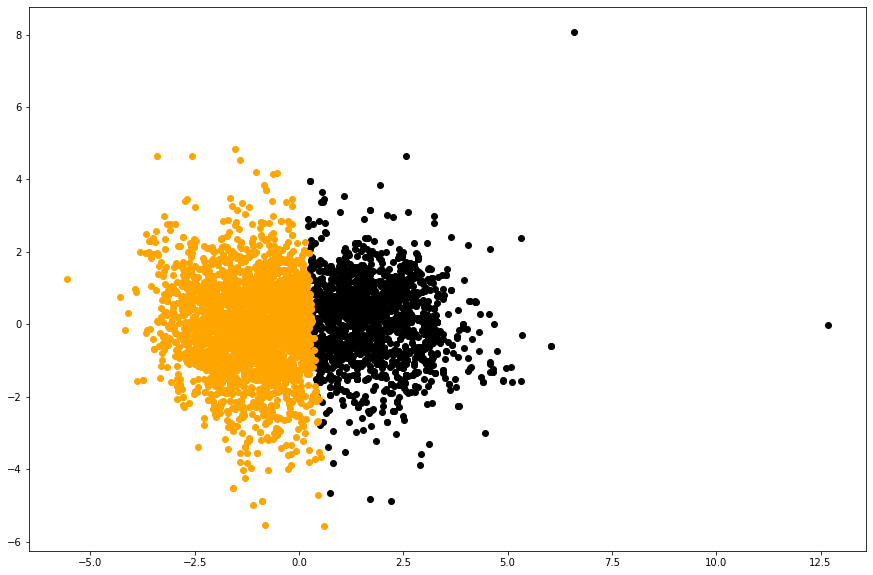

In [50]:
plt.figure(figsize = (15,10))
plt.scatter(X_white_train_3[X_white_train_3['cluster'] == 0].loc[:,'PCA1'],X_white_train_3[X_white_train_3['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_white_train_3[X_white_train_3['cluster'] == 1].loc[:,'PCA1'],X_white_train_3[X_white_train_3['cluster'] == 1].loc[:,'PCA2'],color = 'orange')
plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)

In [51]:
#test3 
clusters = km.predict(X_white_test_3)

X_white_test_3 = pd.DataFrame(pca_3.transform(X_white_test_3),columns = ['PCA1','PCA2'])
X_white_test_3['cluster'] = clusters


In [52]:
f = confusion_matrix(y_white_test_3,clusters)
f_1 = np.mean(y_white_test_3 == clusters)

In [53]:
classificationSummary(y_white_test_3,clusters)

Confusion Matrix (Accuracy 0.5327)

       Prediction
Actual   0   1
     0 163 217
     1  12  98


In [54]:
precision = (98/(98+217))
print("Precision : {}".format(precision))

Precision : 0.3111111111111111


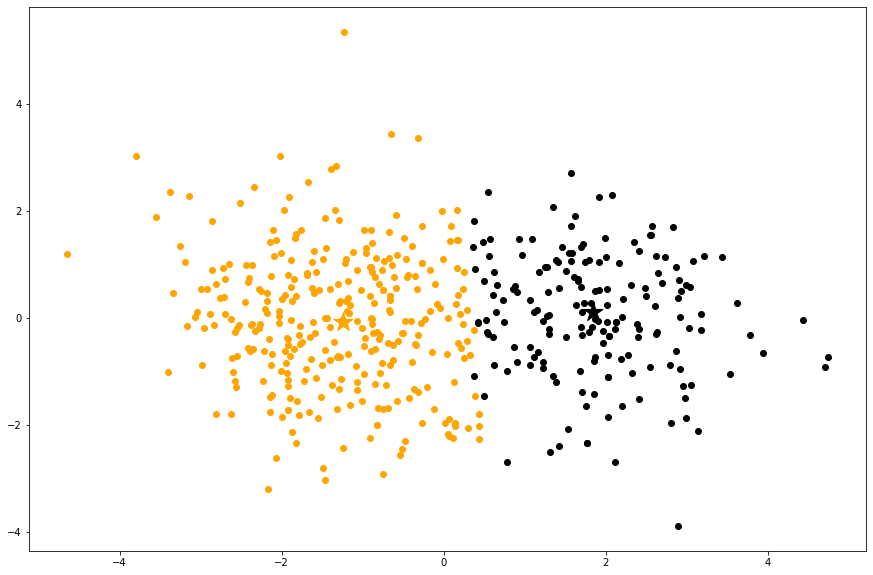

In [55]:
plt.figure(figsize = (15,10))
plt.scatter(X_white_test_3[X_white_test_3['cluster'] == 0].loc[:,'PCA1'],X_white_test_3[X_white_test_3['cluster'] == 0].loc[:,'PCA2'],color = 'black')
plt.scatter(X_white_test_3[X_white_test_3['cluster'] == 1].loc[:,'PCA1'],X_white_test_3[X_white_test_3['cluster'] == 1].loc[:,'PCA2'],color = 'orange')
plt.scatter(X_centre['PCA1'].loc[0],X_centre['PCA2'].loc[0],color = 'black',marker = '*',s = 400)
plt.scatter(X_centre['PCA1'].loc[1],X_centre['PCA2'].loc[1],color = 'orange',marker = '*',s = 400)

In [56]:
Mean1 = (d+e+f)/3
print("Mean_Confusion_matrix_White_wine:\n {}".format(Mean1)) 
mean1 = (d_1 + e_1 + f_1)/3
print("Mean_accuracy_White_wine: {}".format(mean1))

Mean_Confusion_matrix_White_wine:
 [[188.66666667 198.66666667]
 [ 31.66666667  71.        ]]
Mean_accuracy_White_wine: 0.5299319727891156


# Regression model

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def a(y_true, y_prediction):
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)
 
    # Precision or positive predictive value
    Precision = TP/(TP+FP)

    return FP,FN,TP,TN,Precision

In [59]:
#red
red_train_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\red_train_1.csv')
red_test_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\red_test_1.csv')
X_red_train_1=red_train_1.drop(['quality'],axis=1)
X_red_test_1=red_test_1.drop(['quality'],axis=1)
y_red_train_1=red_train_1['quality']
y_red_test_1=red_test_1['quality'] 

In [60]:
mm = MinMaxScaler()
X_red_train_1 = mm.fit_transform(X_red_train_1)
X_red_test_1 = mm.transform(X_red_test_1)

In [61]:
lr = LinearRegression().fit(X_red_train_1,y_red_train_1)

print("Accurancy: {}".format(lr.score(X_red_test_1,y_red_test_1)))
y_prediction = list(np.around(np.array(lr.predict(X_red_test_1)),0))
y_true = y_red_test_1

Accurancy: 0.2905520217191234


In [62]:
confusion_matrix = confusion_matrix(y_red_test_1,y_prediction )
print(confusion_matrix)

[[ 0  0  1  0  0  0]
 [ 0  0  3  2  0  0]
 [ 0  0 41 18  0  0]
 [ 0  0 32 43  1  0]
 [ 0  0  1  8  7  0]
 [ 0  0  0  0  3  0]]


In [63]:
X = a(y_true,y_prediction)

<ipython-input-58-87a397bf5c65>:8: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)


In [64]:
pd.DataFrame(X,columns = sorted(y_red_test_1.unique()), index = ['FP','FN','TP','TN','Pecision'])

,3,4,5,6,7,8
FP,0.0,0.0,37.000000,28.000000,4.000000,0.0
FN,1.0,5.0,18.000000,33.000000,9.000000,3.0
TP,0.0,0.0,41.000000,43.000000,7.000000,0.0
TN,159.0,155.0,64.000000,56.000000,140.000000,157.0
Pecision,NaN,NaN,0.525641,0.605634,0.636364,NaN


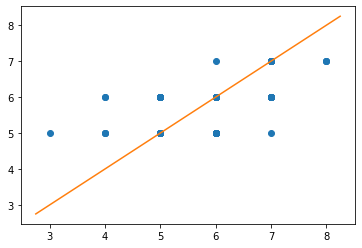

In [65]:
plt.plot(y_red_test_1,y_prediction,'o')
axes = plt.gca()
plt.plot(axes.get_xlim(),axes.get_xlim(), '-')
plt.show()

In [66]:
##########

In [67]:
#red
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
red_train_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\red_train_1.csv')
red_test_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\red_test_1.csv')
X_red_train_1=red_train_1.drop(['quality'],axis=1)
X_red_test_1=red_test_1.drop(['quality'],axis=1)
y_red_train_1=red_train_1['quality']
y_red_test_1=red_test_1['quality']
mm = MinMaxScaler()
X_red_train_1 = mm.fit_transform(X_red_train_1)
X_red_test_1 = mm.transform(X_red_test_1)

In [68]:
lg = LogisticRegression(max_iter = 10000).fit(X_red_train_1,y_red_train_1)

print("Accurancy: {}".format(lg.score(X_red_test_1,y_red_test_1)))
y_prediction = lg.predict(X_red_test_1)
y_true = y_red_test_1

Accurancy: 0.4875


In [69]:
confusion_matrix = confusion_matrix(y_red_test_1,y_prediction )
print(confusion_matrix)

[[ 0  0  1  0  0  0]
 [ 0  0  2  3  0  0]
 [ 0  0 44 15  0  0]
 [ 0  0 43 32  1  0]
 [ 0  0  1 13  2  0]
 [ 0  0  0  1  2  0]]


In [70]:
X = a(y_true,y_prediction)
pd.DataFrame(X,columns = sorted(y_red_test_1.unique()), index = ['FP','FN','TP','TN','Prcision'])

<ipython-input-58-87a397bf5c65>:8: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)


,3,4,5,6,7,8
FP,0.0,0.0,47.000000,32.0,3.0,0.0
FN,1.0,5.0,15.000000,44.0,14.0,3.0
TP,0.0,0.0,44.000000,32.0,2.0,0.0
TN,159.0,155.0,54.000000,52.0,141.0,157.0
Prcision,NaN,NaN,0.483516,0.5,0.4,NaN


In [71]:
#white
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
white_train_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\train\white_train_1.csv')
white_test_1 = pd.read_csv(r'C:\Users\Do Anh Luyen\Creative Cloud Files\Desktop\Task 2\test\white_test_1.csv')
X_white_train_1=white_train_1.drop(['quality'],axis=1)
X_white_test_1=white_test_1.drop(['quality'],axis=1)
y_white_train_1=white_train_1['quality']
y_white_test_1=white_test_1['quality'] 

In [72]:
y_white_train_1 = y_white_train_1.astype('category')
y_white_test_1 = y_white_test_1.astype('category')

In [73]:
X_white_train_1 = mm.fit_transform(X_white_train_1)
X_white_test_1 = mm.transform(X_white_test_1)

In [74]:
lr = LinearRegression().fit(X_white_train_1,y_white_train_1)
print("Precision: {}".format(lr.score(X_white_test_1,y_white_test_1)))
y_prediction = list(np.around(np.array(lr.predict(X_white_test_1)),0))
y_true = y_white_test_1

Precision: 0.2655541307739012


In [75]:
confusion_matrix = confusion_matrix(y_white_test_1,y_prediction )
print(confusion_matrix)

[[  0   0   2   0   0   0   0]
 [  0   0  12  10   0   0   0]
 [  0   0  55  89   4   0   0]
 [  0   0  31 172  23   0   0]
 [  0   0   5  48  21   0   0]
 [  0   0   0  10   7   0   0]
 [  0   0   0   0   1   0   0]]


In [76]:
X = a(y_true,y_prediction)
pd.DataFrame(X,columns = sorted(y_white_test_1.unique()), index = ['FP','FN','TP','TN','Precision'])

<ipython-input-58-87a397bf5c65>:8: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)


,3,4,5,6,7,8,9
FP,0.0,0.0,50.00000,157.000000,35.000,0.0,0.0
FN,2.0,22.0,93.00000,54.000000,53.000,17.0,1.0
TP,0.0,0.0,55.00000,172.000000,21.000,0.0,0.0
TN,488.0,468.0,292.00000,107.000000,381.000,473.0,489.0
Precision,NaN,NaN,0.52381,0.522796,0.375,NaN,NaN


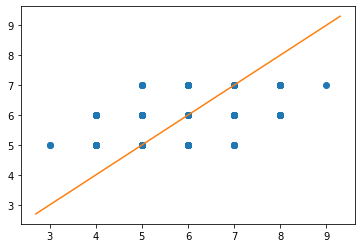

In [77]:
plt.plot(y_white_test_1,y_prediction,'o')
axes = plt.gca()
plt.plot(axes.get_xlim(),axes.get_xlim(), '-')
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
lg = LogisticRegression(max_iter = 10000).fit(X_white_train_1,y_white_train_1)
print("Accuray: {}".format(lg.score(X_white_test_1,y_white_test_1)))
y_prediction = lg.predict(X_white_test_1)
y_true = y_white_test_1

Accuray: 0.5204081632653061


In [80]:
confusion_matrix = confusion_matrix(y_white_test_1,lg.predict(X_white_test_1))
print(confusion_matrix)

[[  0   0   2   0   0   0   0]
 [  0   0  15   7   0   0   0]
 [  0   0  69  78   1   0   0]
 [  0   0  42 173  11   0   0]
 [  0   0   5  56  13   0   0]
 [  0   0   1  12   4   0   0]
 [  0   0   0   0   1   0   0]]


In [81]:
X = a(y_true,y_prediction)
pd.DataFrame(X,columns = sorted(y_white_test_1.unique()), index = ['FP','FN','TP','TN','Precision'])

<ipython-input-58-87a397bf5c65>:8: RuntimeWarning: invalid value encountered in true_divide
  Precision = TP/(TP+FP)


,3,4,5,6,7,8,9
FP,0.0,0.0,65.000000,153.000000,17.000000,0.0,0.0
FN,2.0,22.0,79.000000,53.000000,61.000000,17.0,1.0
TP,0.0,0.0,69.000000,173.000000,13.000000,0.0,0.0
TN,488.0,468.0,277.000000,111.000000,399.000000,473.0,489.0
Precision,NaN,NaN,0.514925,0.530675,0.433333,NaN,NaN
